In [215]:
import pandas as pd
import numpy as np

In [216]:
sheet_names=pd.ExcelFile('indiaWasteData.xlsx').sheet_names
print(sheet_names)

['Main', 'SWMI_2013-14', 'SWMI_2014-15', 'SWMI_2015-16', 'SWMI_2019-20', 'SWMI_2020-21']


## lets dive into year by state-wise data

## India Waste Data in annual year of 2013


In [217]:
import pandas as pd
df1= pd.read_excel('indiaWastedata.xlsx',sheet_name='SWMI_2013-14')
df1

,sr no,states,Solid waste generated (TPD),Collected (TPD),Treated (TPD),Landfilled (TPD),Untreated(TPD)
0,1,Andaman & Nicobar,70,70.0,5.0,NaN,NaN
1,2,Andhra Pradesh/Telengana,11500,10656.0,9418.0,NaN,NaN
2,3,Arunachal Pradesh,110,82.0,74.0,NaN,NaN
3,4,Assam,650,350.0,100.0,NaN,NaN
4,5,Bihar,1670,NaN,NaN,NaN,NaN
5,6,Chandigarh,340,330.0,250.0,NaN,NaN
6,7,Chhattisgarh,1896,1704.0,168.0,NaN,NaN
7,8,Daman Diu & Dadra,85,85.0,NaN,NaN,NaN
8,9,Delhi,8390,7000.0,4150.0,NaN,NaN
9,10,Goa,183,182.0,182.0,NaN,NaN


In [218]:
df1 =df1.drop(['sr no'],axis=1)

In [219]:
df1 =df1.drop(['Untreated(TPD)'],axis=1)

In [220]:
df1 =df1.drop(['Landfilled (TPD)'],axis=1)

In [221]:
df1=df1.rename(columns={'states':'States','Solid waste generated (TPD)':'Waste_generated','Collected (TPD)':'Waste_collected','Treated (TPD)':'Waste_recycled'})

In [222]:
df1.describe(include='all')

,States,Waste_generated,Waste_collected,Waste_recycled
count,34,34.000000,32.000000,26.000000
unique,34,NaN,NaN,NaN
top,Andaman & Nicobar,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,4193.117647,3676.406250,1294.819231
std,NaN,6161.422611,5057.667962,2223.123705
min,NaN,21.000000,49.000000,0.300000
25%,NaN,277.500000,229.750000,80.000000
50%,NaN,1623.000000,1167.500000,285.000000
75%,NaN,5068.500000,4973.500000,1399.750000


In [223]:
df1.isnull().sum()

States             0
Waste_generated    0
Waste_collected    2
Waste_recycled     8
dtype: int64

In [224]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   States           34 non-null     object 
 1   Waste_generated  34 non-null     int64  
 2   Waste_collected  32 non-null     float64
 3   Waste_recycled   26 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [225]:
# Fill NaN values with zero
df1.fillna(0, inplace=True)

##### here 0 means no data provided

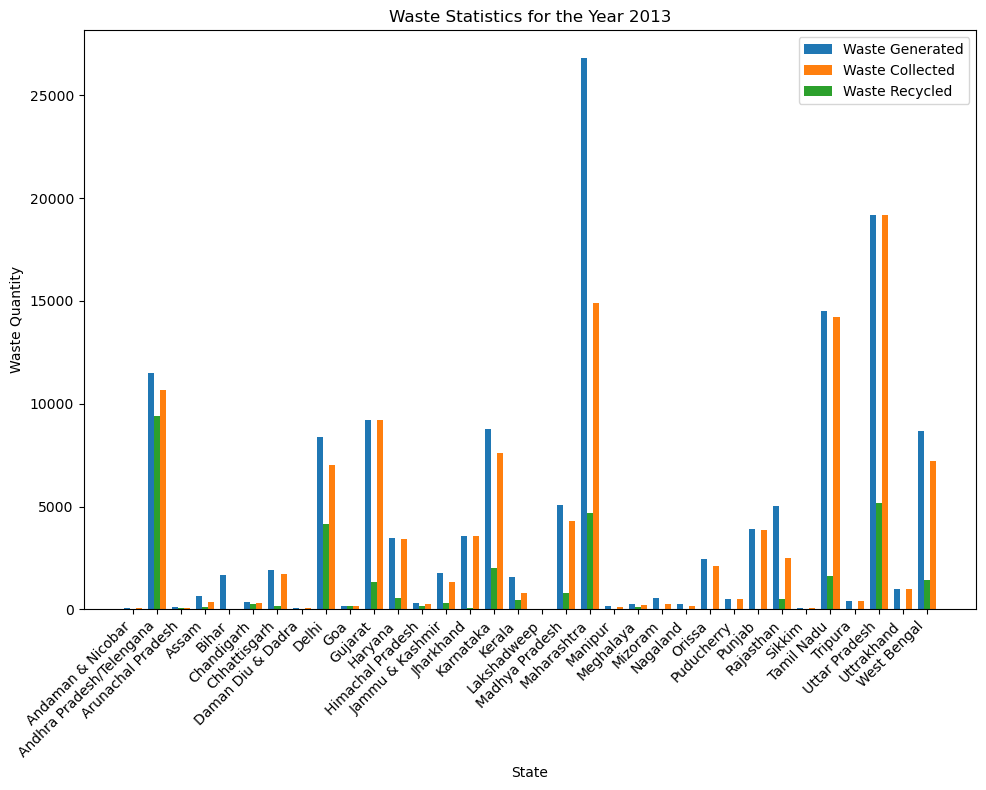

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a bar graph for the first 10 states
plt.figure(figsize=(10, 8))

bar_width = 0.25
bar_positions = range(len(df1['States']))

plt.bar(bar_positions, df1['Waste_generated'], width=bar_width, label='Waste Generated')
plt.bar([pos + 2 * bar_width for pos in bar_positions], df1['Waste_collected'], width=bar_width, label='Waste Collected')
plt.bar([pos + bar_width for pos in bar_positions], df1['Waste_recycled'], width=bar_width, label='Waste Recycled')

plt.xlabel('State')
plt.ylabel('Waste Quantity')
plt.title('Waste Statistics for the Year 2013')
plt.xticks([pos + bar_width for pos in bar_positions], df1['States'], rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()  # Adjust layout to prevent cropping labels
plt.show()

In [227]:
# Calculate recycling rate
df1['Recycling_Rate'] = (df1['Waste_recycled'] / df1['Waste_generated']) * 100

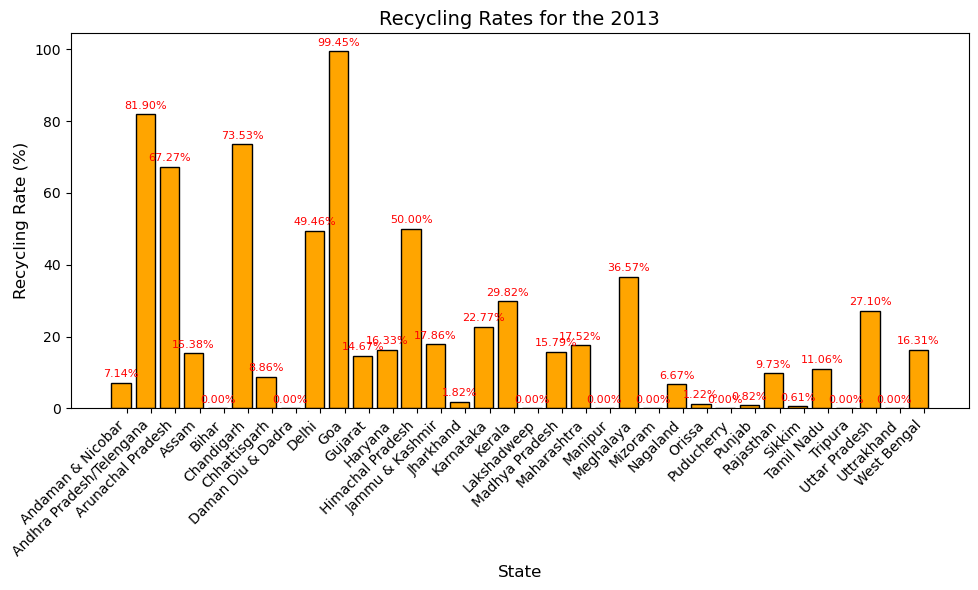

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting a bar graph for Recycling Rates
plt.figure(figsize=(10, 6))

bar_positions = np.arange(len(df1['States']))

# Plotting the Recycling Rates
plt.bar(bar_positions, df1['Recycling_Rate'], color='orange', edgecolor='black')

# Adding data labels
for i, value in enumerate(df1['Recycling_Rate']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='red')

# Adding labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Recycling Rate (%)', fontsize=12)
plt.title('Recycling Rates for the 2013', fontsize=14)
plt.xticks([pos + bar_width for pos in bar_positions], df1['States'], rotation=45, ha='right')  # Rotate labels for better visibility

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [229]:
print(df1[df1['Recycling_Rate'] == 0].count())

States             8
Waste_generated    8
Waste_collected    8
Waste_recycled     8
Recycling_Rate     8
dtype: int64


In [230]:
print(sheet_names)

['Main', 'SWMI_2013-14', 'SWMI_2014-15', 'SWMI_2015-16', 'SWMI_2019-20', 'SWMI_2020-21']


## India Waste Data in annual year of 2014


In [231]:
import pandas as pd
df2= pd.read_excel('indiaWastedata.xlsx',sheet_name='SWMI_2014-15')
df2

,sr no,states,Solid waste generated (TPD),Collected (TPD),Treated (TPD),Landfilled (TPD),Untreated(TPD)
0,1,Andaman &Nicobar,70,70.0,5.0,NaN,NaN
1,2,Andhra Pradesh,4760,4287.0,6402.0,NaN,NaN
2,3,Arunachal Pradesh,116,70.5,0.0,NaN,NaN
3,4,Assam,650,350.0,0.0,NaN,NaN
4,5,Bihar,1670,NaN,NaN,NaN,NaN
5,6,Chandigarh,370,360.0,250.0,NaN,NaN
6,7,Chhattisgarh,1896,1704.0,168.0,NaN,NaN
7,8,Daman Diu &Dadra,85,85.0,NaN,NaN,NaN
8,9,Delhi,8370,8300.0,3240.0,NaN,NaN
9,10,Goa,450,400.0,182.0,NaN,NaN


In [232]:
df2 =df2.drop(['sr no'],axis=1)

In [233]:
df2 =df2.drop(['Untreated(TPD)'],axis=1)

In [234]:
# Fill NaN values with zero
df2.fillna(0, inplace=True)

In [235]:
df2=df2.rename(columns={'states':'States','Solid waste generated (TPD)':'Waste_generated','Collected (TPD)':'Waste_collected','Treated (TPD)':'Waste_recycled','Landfilled (TPD)':'Waste_landfilled'})

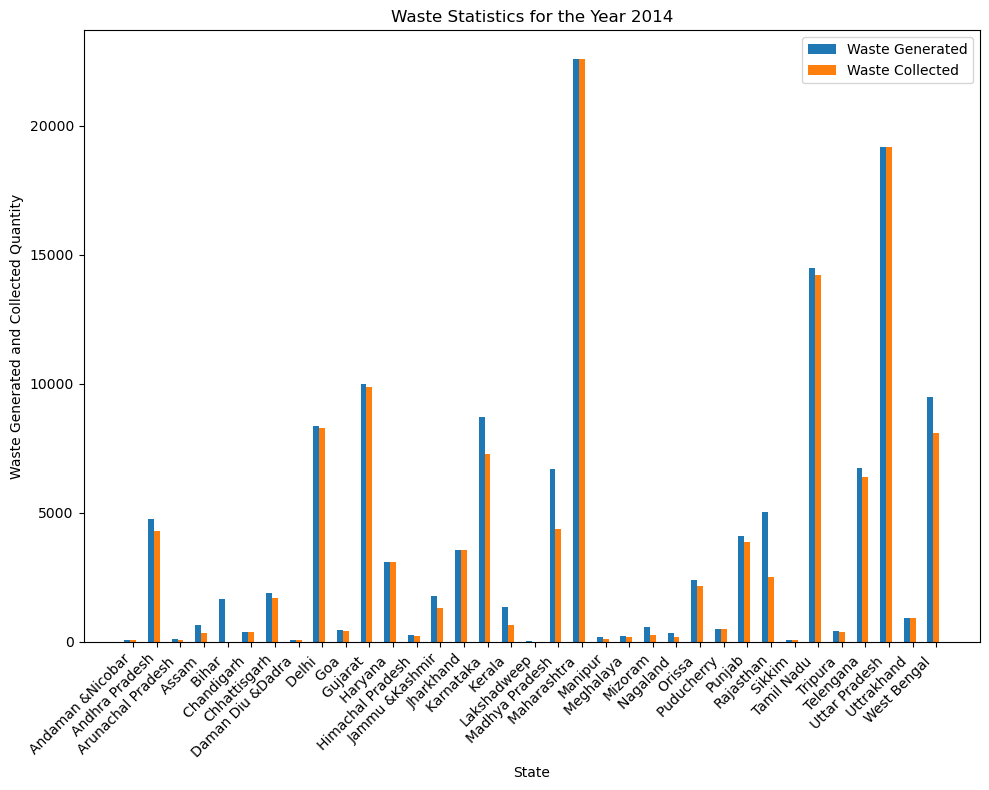

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a bar graph for the first 10 states
plt.figure(figsize=(10, 8))

bar_width = 0.25
bar_positions = range(len(df2['States']))

plt.bar(bar_positions, df2['Waste_generated'], width=bar_width, label='Waste Generated')
plt.bar([pos +bar_width for pos in bar_positions], df2['Waste_collected'], width=bar_width, label='Waste Collected')

plt.xlabel('State')
plt.ylabel('Waste Generated and Collected Quantity')
plt.title('Waste Statistics for the Year 2014')
plt.xticks([pos + bar_width for pos in bar_positions], df2['States'], rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()  # Adjust layout to prevent cropping labels
plt.show()

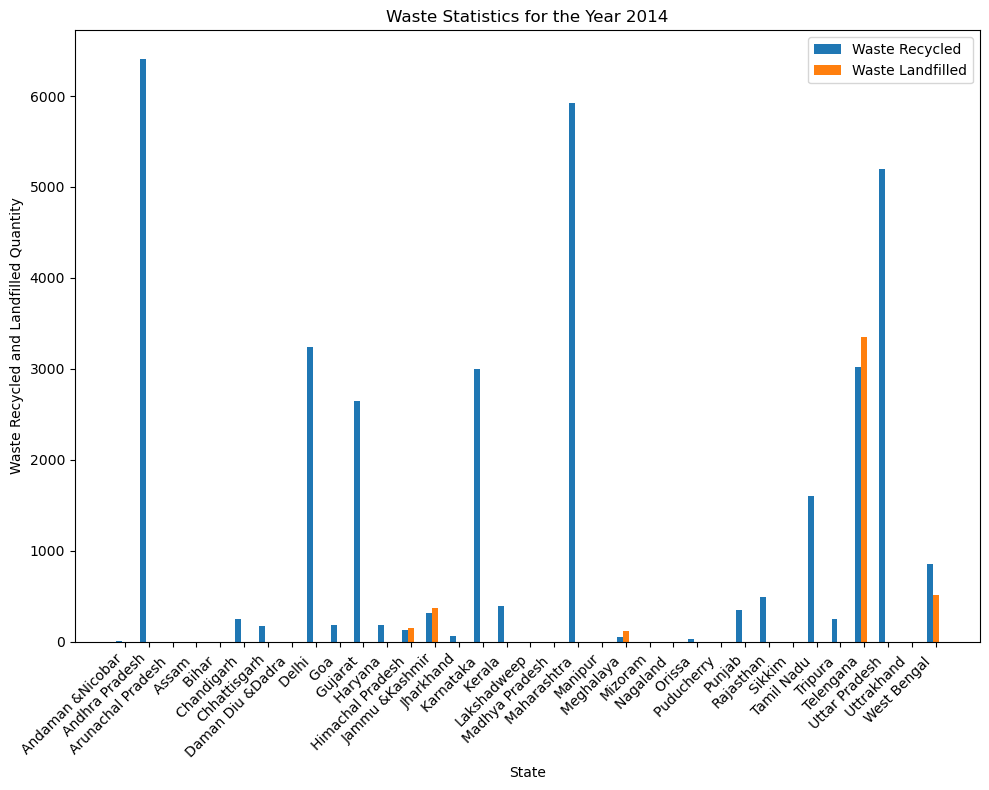

In [237]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a bar graph for the first 10 states
plt.figure(figsize=(10, 8))

bar_width = 0.25
bar_positions = range(len(df2['States']))

plt.bar(bar_positions, df2['Waste_recycled'], width=bar_width, label='Waste Recycled')
plt.bar([pos +bar_width for pos in bar_positions], df2['Waste_landfilled'], width=bar_width, label='Waste Landfilled')

plt.xlabel('State')
plt.ylabel('Waste Recycled and Landfilled Quantity')
plt.title('Waste Statistics for the Year 2014')
plt.xticks([pos + bar_width for pos in bar_positions], df2['States'], rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()  # Adjust layout to prevent cropping labels
plt.show()

In [238]:
# alculate recycling rate
df2['Recycling_Rate'] = (df2['Waste_recycled'] / df2['Waste_generated']) * 100
# Landfill Rate (%)
df2['Landfill_Rate'] = (df2['Waste_landfilled']/df2['Waste_generated']) * 100
import pandas as pd

#Total Waste Managed
df2['Total_Waste_Managed'] = df2['Waste_collected'] + df2['Waste_recycled'] + df2['Waste_landfilled']

In [239]:
# Cap recycling rates at 100%
df2['Recycling_Rate'] = np.minimum(df2['Recycling_Rate'], 100)

In [240]:
df2

,States,Waste_generated,Waste_collected,Waste_recycled,Waste_landfilled,Recycling_Rate,Landfill_Rate,Total_Waste_Managed
0,Andaman &Nicobar,70,70.0,5.0,0.0,7.142857,0.000000,75.0
1,Andhra Pradesh,4760,4287.0,6402.0,0.0,100.000000,0.000000,10689.0
2,Arunachal Pradesh,116,70.5,0.0,0.0,0.000000,0.000000,70.5
3,Assam,650,350.0,0.0,0.0,0.000000,0.000000,350.0
4,Bihar,1670,0.0,0.0,0.0,0.000000,0.000000,0.0
5,Chandigarh,370,360.0,250.0,0.0,67.567568,0.000000,610.0
6,Chhattisgarh,1896,1704.0,168.0,0.0,8.860759,0.000000,1872.0
7,Daman Diu &Dadra,85,85.0,0.0,0.0,0.000000,0.000000,85.0
8,Delhi,8370,8300.0,3240.0,0.0,38.709677,0.000000,11540.0
9,Goa,450,400.0,182.0,0.0,40.444444,0.000000,582.0


In [241]:
print(sheet_names)

['Main', 'SWMI_2013-14', 'SWMI_2014-15', 'SWMI_2015-16', 'SWMI_2019-20', 'SWMI_2020-21']


#### India Waste Data in annual year of 2015

In [242]:
import pandas as pd
df3 = pd.read_excel('indiaWastedata.xlsx',sheet_name='SWMI_2015-16',skiprows=1)
df3

,sr no,states,Solid waste generated (TPD),Collected (TPD),Treated (TPD),Landfilled (TPD),Untreated(TPD)
0,1,Andaman Nicobar*,70.00,70.00,5.00,NaN,NaN
1,2,Andhra Pradesh,6440.00,6331.00,500.00,143.00,NaN
2,3,Arunachal Pradesh,13.00,11.00,NaN,NaN,NaN
3,4,Assam,7920.00,6336.00,200.00,NaN,NaN
4,5,Bihar,1670.00,0.00,0.00,NaN,NaN
5,6,Chandigarh,370.00,360.00,NaN,230.00,NaN
6,7,Chhattisgarh,2245.25,2036.97,828.18,1294.97,NaN
7,8,Daman Diu*,85.00,85.00,0.00,0.00,NaN
8,9,Delhi,9620.00,8300.00,3240.00,5060.00,NaN
9,10,Goa,450.00,400.00,182.00,0.00,NaN


In [243]:
df3 = df3.drop(columns=['sr no','Untreated(TPD)'],axis=1)

In [244]:
df3=df3.rename(columns={'states':'States','Solid waste generated (TPD)':'Waste_generated','Collected (TPD)':'Waste_collected','Treated (TPD)':'Waste_recycled','Landfilled (TPD)':'Waste_landfilled'})

In [245]:
# Fill NaN values with zero
df3.fillna(0, inplace=True)

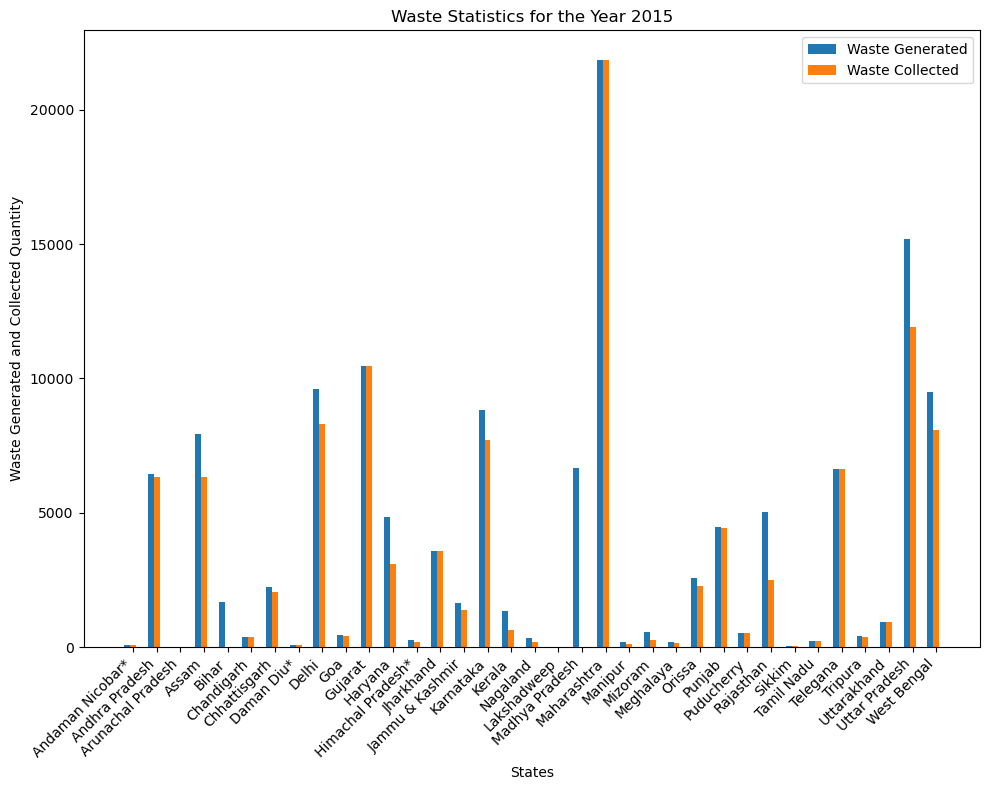

In [246]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a bar graph for the first 10 states
plt.figure(figsize=(10, 8))

bar_width = 0.25
bar_positions = range(len(df3['States']))

plt.bar(bar_positions, df3['Waste_generated'], width=bar_width, label='Waste Generated')
plt.bar([pos +bar_width for pos in bar_positions], df3['Waste_collected'], width=bar_width, label='Waste Collected')

plt.xlabel('States')
plt.ylabel('Waste Generated and Collected Quantity')
plt.title('Waste Statistics for the Year 2015')
plt.xticks([pos + bar_width for pos in bar_positions], df3['States'], rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()  # Adjust layout to prevent cropping labels
plt.show()

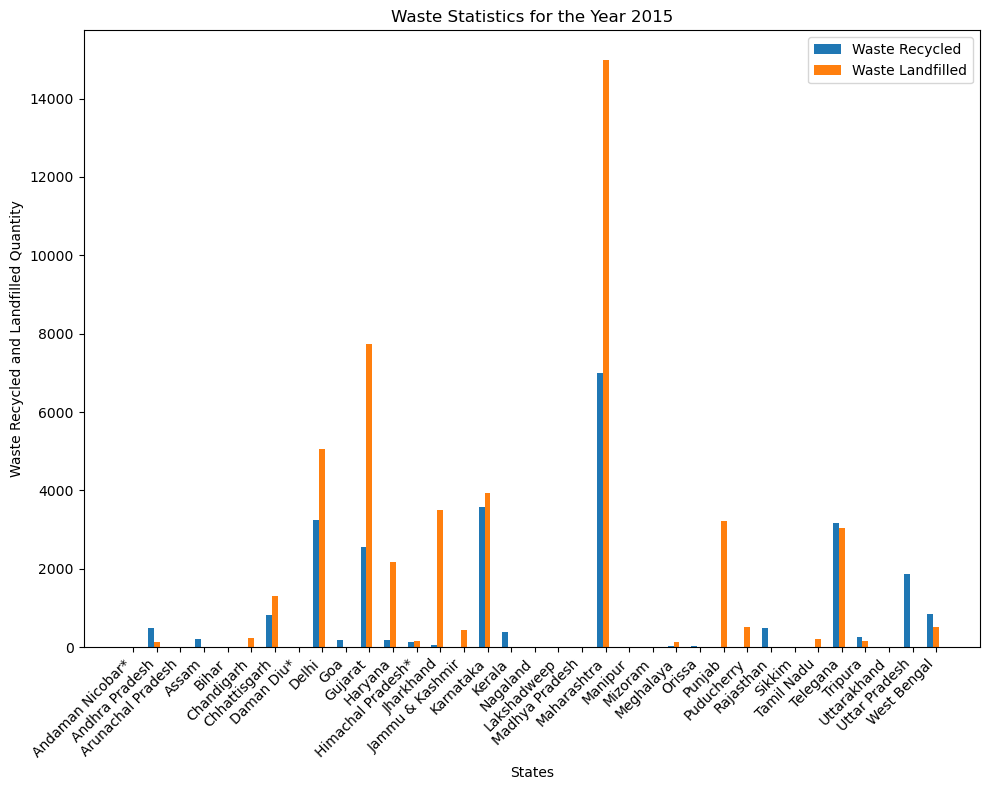

In [247]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a bar graph for the first 10 states
plt.figure(figsize=(10, 8))

bar_width = 0.25
bar_positions = range(len(df3['States']))

plt.bar(bar_positions, df3['Waste_recycled'], width=bar_width, label='Waste Recycled')
plt.bar([pos +bar_width for pos in bar_positions], df3['Waste_landfilled'], width=bar_width, label='Waste Landfilled')

plt.xlabel('States')
plt.ylabel('Waste Recycled and Landfilled Quantity')
plt.title('Waste Statistics for the Year 2015')
plt.xticks([pos + bar_width for pos in bar_positions], df3['States'], rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()  # Adjust layout to prevent cropping labels
plt.show()

In [248]:
# Calculate recycling rate
df3['Recycling_Rate'] = (df3['Waste_recycled'] / df3['Waste_generated']) * 100
# Landfill Rate (%)
df3['Landfill_Rate'] = (df3['Waste_landfilled']/df3['Waste_generated']) * 100
import pandas as pd

#Total Waste Managed
df3['Total_Waste_Managed'] = df3['Waste_collected'] + df3['Waste_recycled'] + df3['Waste_landfilled']

In [249]:
# Remove asterisk (*) from the 'State' column
df3['States'] = df3['States'].str.replace('*', '')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10280\4097300856.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['States'] = df3['States'].str.replace('*', '')


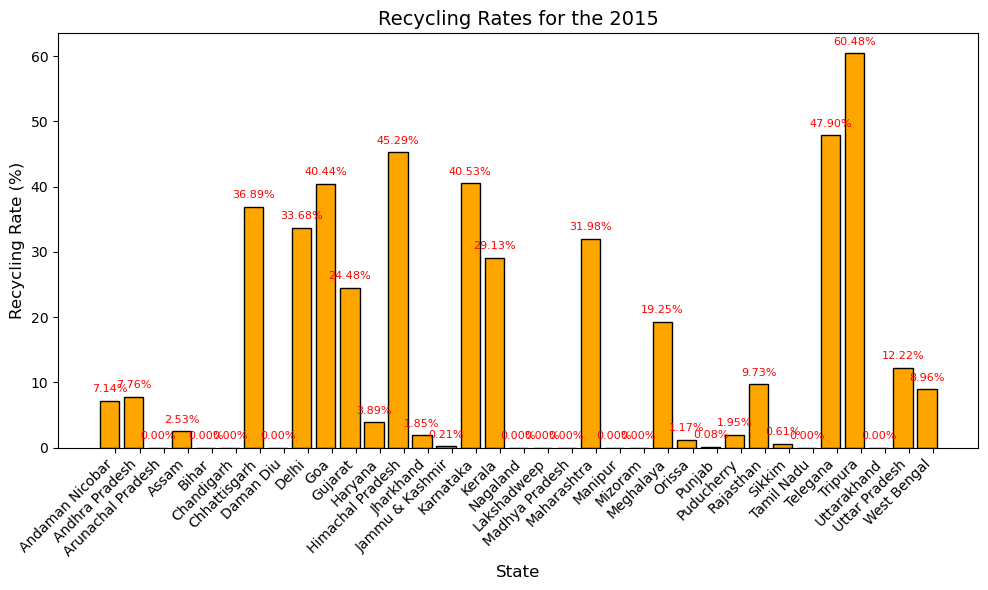

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting a bar graph for Recycling Rates
plt.figure(figsize=(10, 6))

bar_positions = np.arange(len(df3['States']))

# Plotting the Recycling Rates
plt.bar(bar_positions, df3['Recycling_Rate'], color='orange', edgecolor='black')

# Adding data labels
for i, value in enumerate(df3['Recycling_Rate']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='red')

# Adding labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Recycling Rate (%)', fontsize=12)
plt.title('Recycling Rates for the 2015', fontsize=14)
plt.xticks([pos + bar_width for pos in bar_positions], df3['States'], rotation=45, ha='right')  # Rotate labels for better visibility

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [251]:
df3


,States,Waste_generated,Waste_collected,Waste_recycled,Waste_landfilled,Recycling_Rate,Landfill_Rate,Total_Waste_Managed
0,Andaman Nicobar,70.00,70.00,5.00,0.00,7.142857,0.000000,75.00
1,Andhra Pradesh,6440.00,6331.00,500.00,143.00,7.763975,2.220497,6974.00
2,Arunachal Pradesh,13.00,11.00,0.00,0.00,0.000000,0.000000,11.00
3,Assam,7920.00,6336.00,200.00,0.00,2.525253,0.000000,6536.00
4,Bihar,1670.00,0.00,0.00,0.00,0.000000,0.000000,0.00
5,Chandigarh,370.00,360.00,0.00,230.00,0.000000,62.162162,590.00
6,Chhattisgarh,2245.25,2036.97,828.18,1294.97,36.885870,57.675983,4160.12
7,Daman Diu,85.00,85.00,0.00,0.00,0.000000,0.000000,85.00
8,Delhi,9620.00,8300.00,3240.00,5060.00,33.679834,52.598753,16600.00
9,Goa,450.00,400.00,182.00,0.00,40.444444,0.000000,582.00


In [252]:
# Create a cross-tabulation between 'State' and 'Recycling_Rate'
cross_tab1 = pd.crosstab(index=df3['States'], columns=pd.cut(df3['Recycling_Rate'], bins=[0, 50, 100], labels=['<50', '50-100']))
# Print the cross-tabulation
cross_tab1

Recycling_Rate,<50,50-100
States,,
Andaman Nicobar,1,0
Andhra Pradesh,1,0
Assam,1,0
Chhattisgarh,1,0
Delhi,1,0
Goa,1,0
Gujarat,1,0
Haryana,1,0
Himachal Pradesh,1,0


### India Waste Data in annual year of 2019

In [253]:
import pandas as pd
df4 = pd.read_excel('indiaWastedata.xlsx',sheet_name='SWMI_2019-20')
df4

,sr no,states,Solid waste generated (TPD),Collected (TPD),Treated (TPD),Landfilled (TPD),Untreated(TPD)
0,1.0,Andhra Pradesh,6766.000,6140,1059.0000,203.000,NaN
1,2.0,Arunachal Pradesh,28.000,223.56,NaN,127.720,NaN
2,3.0,Assam,1271.305,922.4115,41.6625,880.749,NaN
3,4.0,Bihar,4334.000,NaN,0.0000,0.000,NaN
4,5.0,Chhattisgarh,1650.000,1650,1385.0000,265.000,NaN
5,6.0,Goa,188.880,180.38,148.9100,15.590,NaN
6,7.0,Gujarat,0.000,10755,6924.0000,3831.000,NaN
7,8.0,Haryana,5231.900,4808.8,1620.6000,3188.200,NaN
8,9.0,Himchal Pradesh,393.000,354,230.0000,124.000,NaN
9,10.0,Jammu & Kashmir,1518.910,1464.65,540.1900,0.000,NaN


In [254]:
# Delete rows 33 to 44
rows_to_delete = list(range(34, 44))
df4.drop(index=rows_to_delete,inplace=True)

In [255]:
df4 = df4.drop(columns=['sr no','Untreated(TPD)'],axis=1)

In [256]:
df4=df4.rename(columns={'states':'States','Solid waste generated (TPD)':'Waste_generated','Collected (TPD)':'Waste_collected','Treated (TPD)':'Waste_recycled','Landfilled (TPD)':'Waste_landfilled'})

In [257]:
# Fill NaN values with zero
df4.fillna(0, inplace=True)

In [258]:
#Replace all occurrences of 0 with a specific value (e.g., replace with -1)
df4.replace(0,10755)

,States,Waste_generated,Waste_collected,Waste_recycled,Waste_landfilled
0,Andhra Pradesh,6766.000,6140.0000,1059.0000,203.000
1,Arunachal Pradesh,28.000,223.5600,10755.0000,127.720
2,Assam,1271.305,922.4115,41.6625,880.749
3,Bihar,4334.000,10755.0000,10755.0000,10755.000
4,Chhattisgarh,1650.000,1650.0000,1385.0000,265.000
5,Goa,188.880,180.3800,148.9100,15.590
6,Gujarat,10755.000,10755.0000,6924.0000,3831.000
7,Haryana,5231.900,4808.8000,1620.6000,3188.200
8,Himchal Pradesh,393.000,354.0000,230.0000,124.000
9,Jammu & Kashmir,1518.910,1464.6500,540.1900,10755.000


In [259]:
df4.info() #use to find null value,if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   States            34 non-null     object 
 1   Waste_generated   34 non-null     float64
 2   Waste_collected   34 non-null     float64
 3   Waste_recycled    34 non-null     float64
 4   Waste_landfilled  34 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


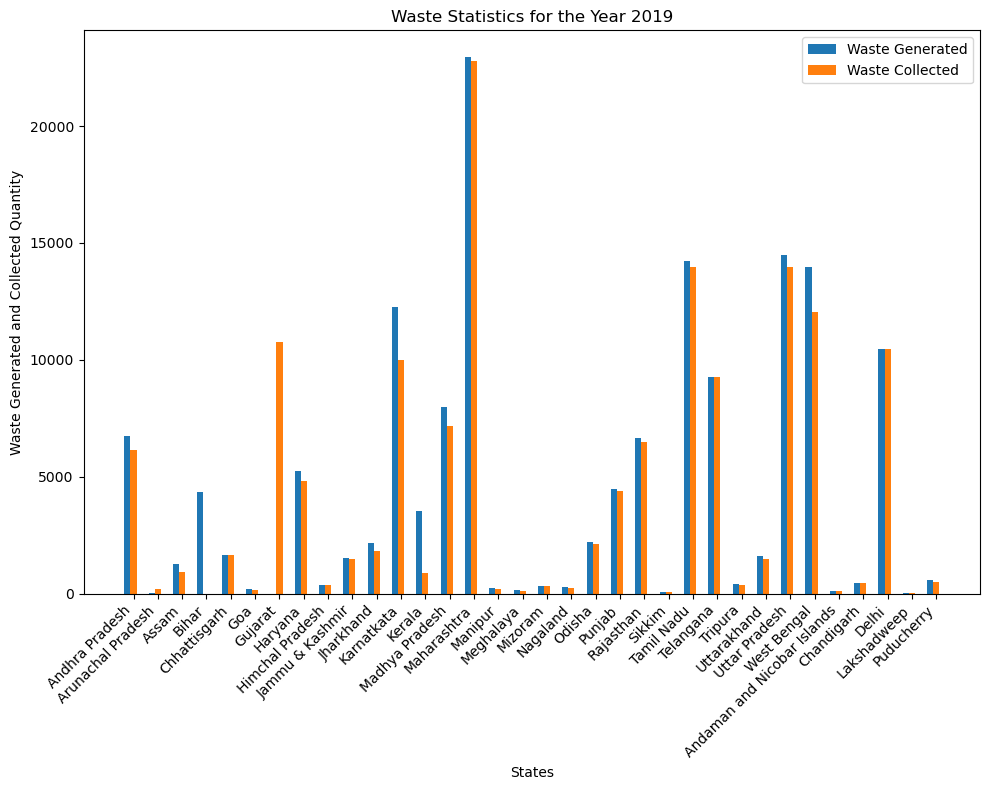

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a bar graph for the first 10 states
plt.figure(figsize=(10, 8))

bar_width = 0.25
bar_positions = range(len(df4['States']))

plt.bar(bar_positions, df4['Waste_generated'], width=bar_width, label='Waste Generated')
plt.bar([pos +bar_width for pos in bar_positions], df4['Waste_collected'], width=bar_width, label='Waste Collected')

plt.xlabel('States')
plt.ylabel('Waste Generated and Collected Quantity')
plt.title('Waste Statistics for the Year 2019')
plt.xticks([pos + bar_width for pos in bar_positions], df4['States'], rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()  # Adjust layout to prevent cropping labels
plt.show()

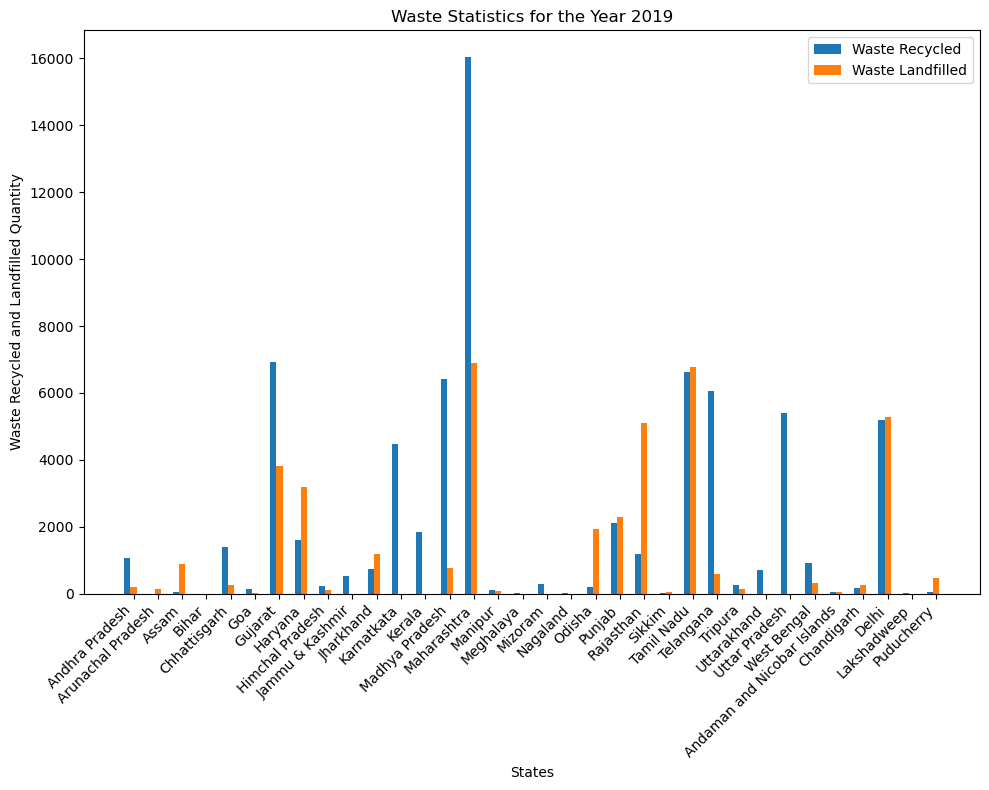

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a bar graph for the first 10 states
plt.figure(figsize=(10, 8))

bar_width = 0.25
bar_positions = range(len(df4['States']))

plt.bar(bar_positions, df4['Waste_recycled'], width=bar_width, label='Waste Recycled')
plt.bar([pos +bar_width for pos in bar_positions], df4['Waste_landfilled'], width=bar_width, label='Waste Landfilled')

plt.xlabel('States')
plt.ylabel('Waste Recycled and Landfilled Quantity')
plt.title('Waste Statistics for the Year 2019')
plt.xticks([pos + bar_width for pos in bar_positions], df4['States'], rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()  # Adjust layout to prevent cropping labels
plt.show()

In [262]:
# Calculate recycling rate
df4['Recycling_Rate'] = (df4['Waste_recycled'] / df4['Waste_generated']) * 100

posx and posy should be finite values
posx and posy should be finite values


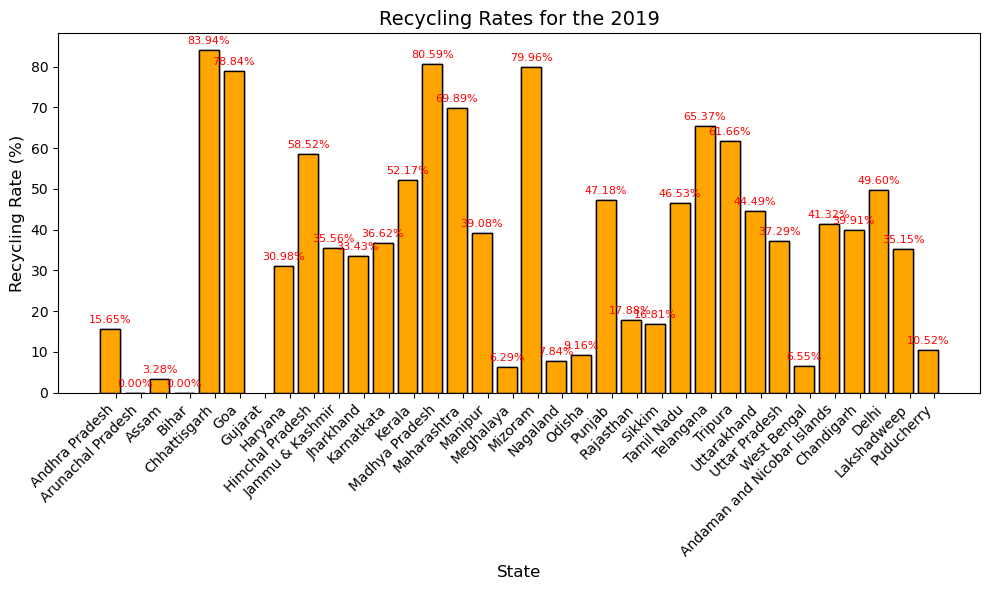

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting a bar graph for Recycling Rates
plt.figure(figsize=(10, 6))

bar_positions = np.arange(len(df4['States']))

# Plotting the Recycling Rates
plt.bar(bar_positions, df4['Recycling_Rate'], color='orange', edgecolor='black')
plt.bar(bar_positions, df4['Recycling_Rate'], color='orange', edgecolor='black')
# Adding data labels
for i, value in enumerate(df4['Recycling_Rate']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='red')

# Adding labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Recycling Rate (%)', fontsize=12)
plt.title('Recycling Rates for the 2019', fontsize=14)
plt.xticks([pos + bar_width for pos in bar_positions], df4['States'], rotation=45, ha='right')  # Rotate labels for better visibility

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [264]:
# Landfill Rate (%)
df4['Landfill_Rate'] = (df4['Waste_landfilled']/df4['Waste_generated']) * 100

#Total Waste Managed
df4['Total_Waste_Managed'] = df4['Waste_collected'] + df4['Waste_recycled'] + df4['Waste_landfilled']

In [265]:
import pandas as pd
import numpy as np

# Replace 400 with 100 in 'Landfill_Rate'
df4.loc[df4['Landfill_Rate'] >= 100, 'Landfill_Rate'] = 100

# Replace inf values with 0 in 'Recycling Rate' and 'Landfill Rate'
df4.replace([np.inf, -np.inf], 0, inplace=True)

In [266]:
df4

,States,Waste_generated,Waste_collected,Waste_recycled,Waste_landfilled,Recycling_Rate,Landfill_Rate,Total_Waste_Managed
0,Andhra Pradesh,6766.000,6140.0000,1059.0000,203.000,15.651788,3.000296,7402.000
1,Arunachal Pradesh,28.000,223.5600,0.0000,127.720,0.000000,100.000000,351.280
2,Assam,1271.305,922.4115,41.6625,880.749,3.277144,69.279127,1844.823
3,Bihar,4334.000,0.0000,0.0000,0.000,0.000000,0.000000,0.000
4,Chhattisgarh,1650.000,1650.0000,1385.0000,265.000,83.939394,16.060606,3300.000
5,Goa,188.880,180.3800,148.9100,15.590,78.838416,8.253918,344.880
6,Gujarat,0.000,10755.0000,6924.0000,3831.000,0.000000,100.000000,21510.000
7,Haryana,5231.900,4808.8000,1620.6000,3188.200,30.975363,60.937709,9617.600
8,Himchal Pradesh,393.000,354.0000,230.0000,124.000,58.524173,31.552163,708.000
9,Jammu & Kashmir,1518.910,1464.6500,540.1900,0.000,35.564319,0.000000,2004.840


In [267]:
print(sheet_names)

['Main', 'SWMI_2013-14', 'SWMI_2014-15', 'SWMI_2015-16', 'SWMI_2019-20', 'SWMI_2020-21']


#### India Waste Data in annual year of 2020

In [268]:
import pandas as pd
df5 = pd.read_excel('indiaWastedata.xlsx',sheet_name='SWMI_2020-21')
df5

,sr no,states,Solid waste generated (TPD),Collected (TPD),Treated (TPD),Landfilled (TPD),Untreated(TPD)
0,1,Andhra Pradesh,6898.00,6829.000,1133.00,205.00,5491
1,2,Arunachal Pradesh,236.51,202.110,NaN,27.50,Not provided
2,3,Assam,1199.00,1091.000,41.40,0.00,1049.6
3,4,Bihar,4281.27,4013.550,NaN,NaN,Not provided
4,5,Chhattisgarh,1650.00,1650.000,1650.00,0.00,0
5,6,Goa,226.87,218.870,197.47,22.05,-0.65
6,7,Gujarat,10373.79,10332.000,6946.00,3385.82,0.18
7,8,Haryana,5352.12,5291.410,3123.90,2167.51,0
8,9,Himachal Pradesh,346.00,332.000,221.00,111.00,0
9,10,Jammu & Kashmir,1463.23,1437.280,547.50,376.00,513.78


In [269]:
df5 =df5.drop(['sr no'],axis=1)

In [270]:
# Fill NaN values with zero
df5.fillna(0, inplace=True)

In [271]:
# Replace 'Not provided' with 0 in the entire DataFrame
df5.replace('Not provided', 0, inplace=True)

In [272]:
# Replace negative values with 0 in specific columns
columns_to_replace = ['Solid waste generated (TPD)', 'Collected (TPD)', 'Treated (TPD)', 'Landfilled (TPD)','Untreated(TPD)']
df5[columns_to_replace] = df5[columns_to_replace].apply(lambda x: x.clip(lower=0))

In [273]:
df5=df5.rename(columns={'states':'States','Solid waste generated (TPD)':'Waste_generated','Collected (TPD)':'Waste_collected','Treated (TPD)':'Waste_recycled','Landfilled (TPD)':'Waste_landfilled','Untreated(TPD)':'Untreated'})

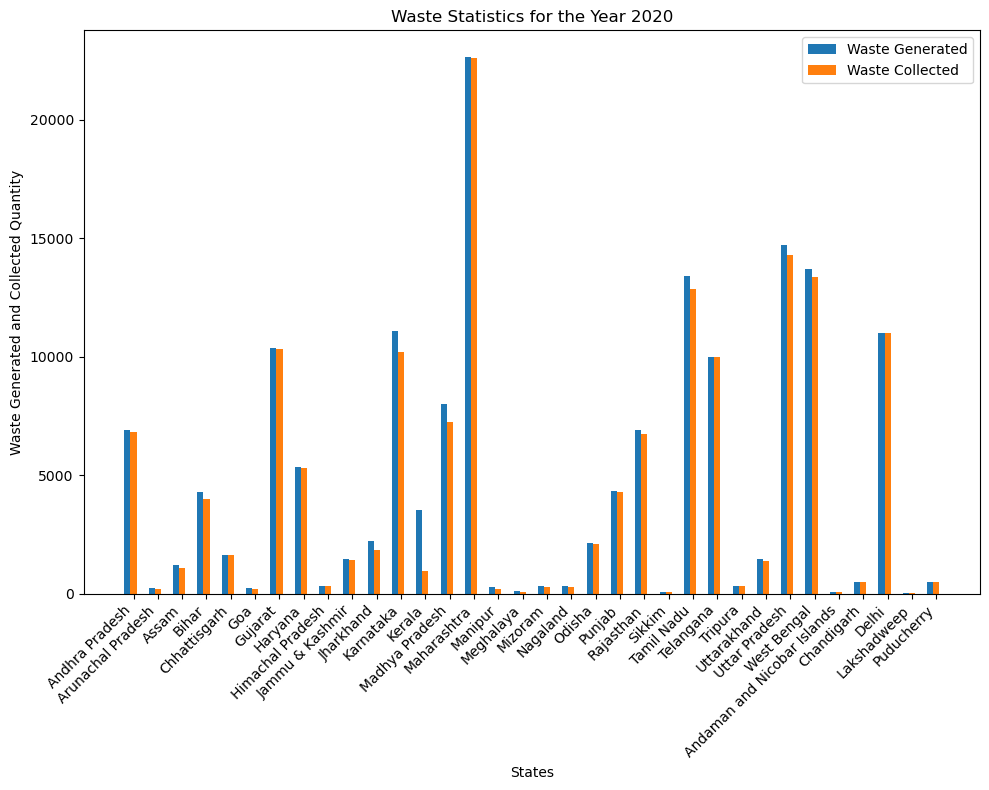

In [274]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a bar graph for the first 10 states
plt.figure(figsize=(10, 8))

bar_width = 0.25
bar_positions = range(len(df5['States']))

plt.bar(bar_positions, df5['Waste_generated'], width=bar_width, label='Waste Generated')
plt.bar([pos +bar_width for pos in bar_positions], df5['Waste_collected'], width=bar_width, label='Waste Collected')

plt.xlabel('States')
plt.ylabel('Waste Generated and Collected Quantity')
plt.title('Waste Statistics for the Year 2020')
plt.xticks([pos + bar_width for pos in bar_positions], df5['States'], rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()  # Adjust layout to prevent cropping labels
plt.show()

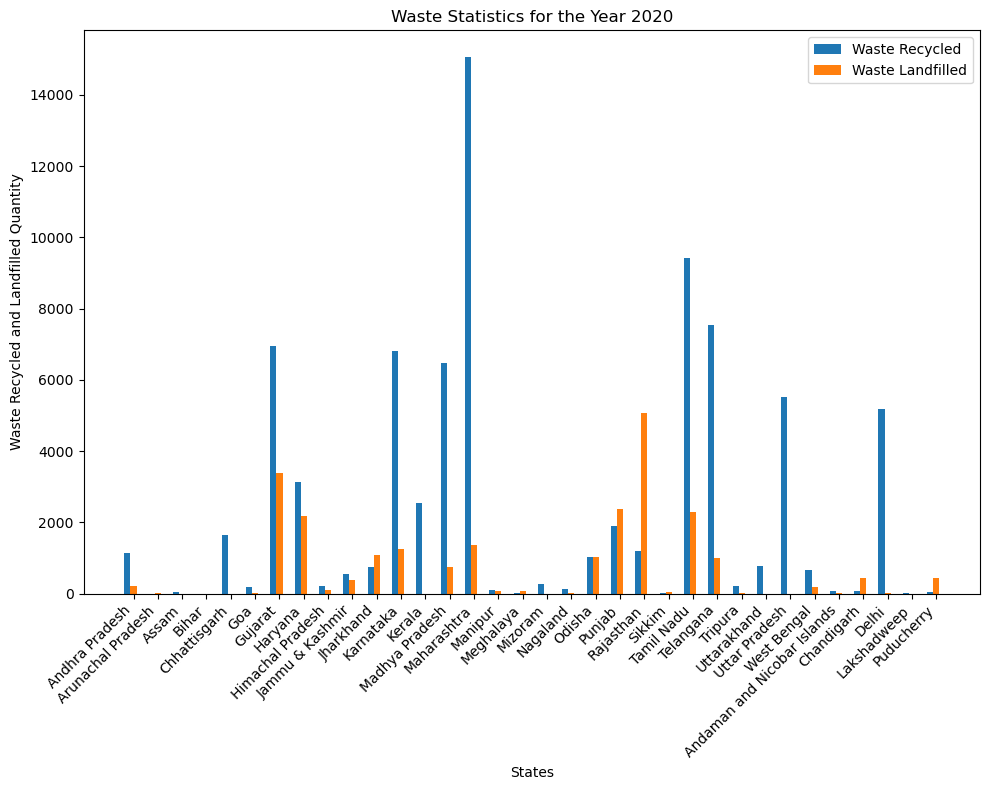

In [275]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a bar graph for the first 10 states
plt.figure(figsize=(10, 8))

bar_width = 0.25
bar_positions = range(len(df5['States']))

plt.bar(bar_positions, df5['Waste_recycled'], width=bar_width, label='Waste Recycled')
plt.bar([pos +bar_width for pos in bar_positions], df5['Waste_landfilled'], width=bar_width, label='Waste Landfilled')

plt.xlabel('States')
plt.ylabel('Waste Recycled and Landfilled Quantity')
plt.title('Waste Statistics for the Year 2020')
plt.xticks([pos + bar_width for pos in bar_positions], df5['States'], rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()  # Adjust layout to prevent cropping labels
plt.show()

In [276]:
# Calculate recycling rate
df5['Recycling_Rate'] = (df5['Waste_recycled'] / df5['Waste_generated']) * 100

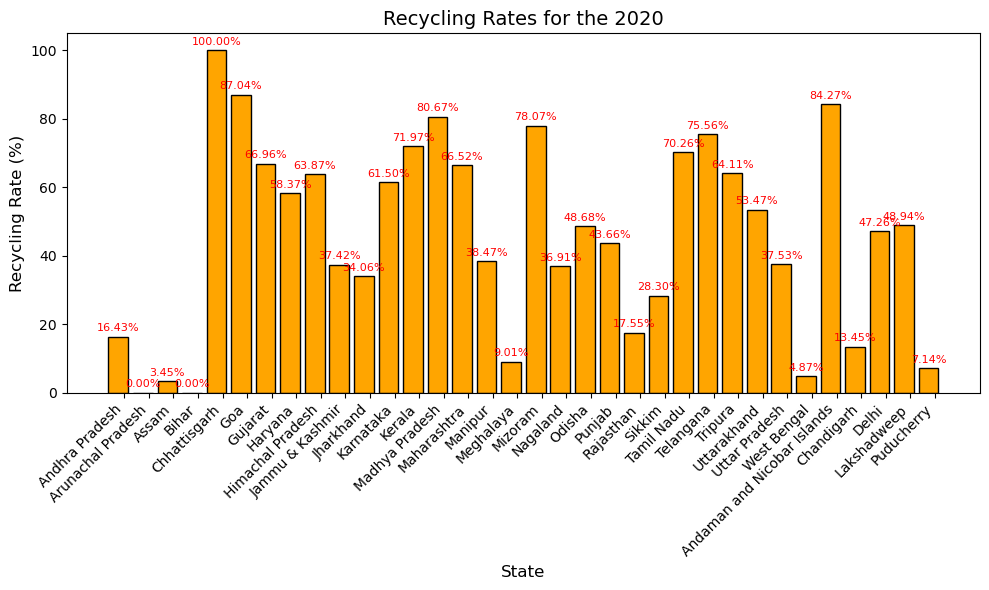

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting a bar graph for Recycling Rates
plt.figure(figsize=(10, 6))

bar_positions = np.arange(len(df4['States']))

# Plotting the Recycling Rates
plt.bar(bar_positions, df5['Recycling_Rate'], color='orange', edgecolor='black')

# Adding data labels
for i, value in enumerate(df5['Recycling_Rate']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='red')

# Adding labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Recycling Rate (%)', fontsize=12)
plt.title('Recycling Rates for the 2020', fontsize=14)
plt.xticks([pos + bar_width for pos in bar_positions], df5['States'], rotation=45, ha='right')  # Rotate labels for better visibility

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [278]:
# Landfill Rate (%)
df5['Landfill_Rate'] = (df5['Waste_landfilled']/df5['Waste_generated']) * 100

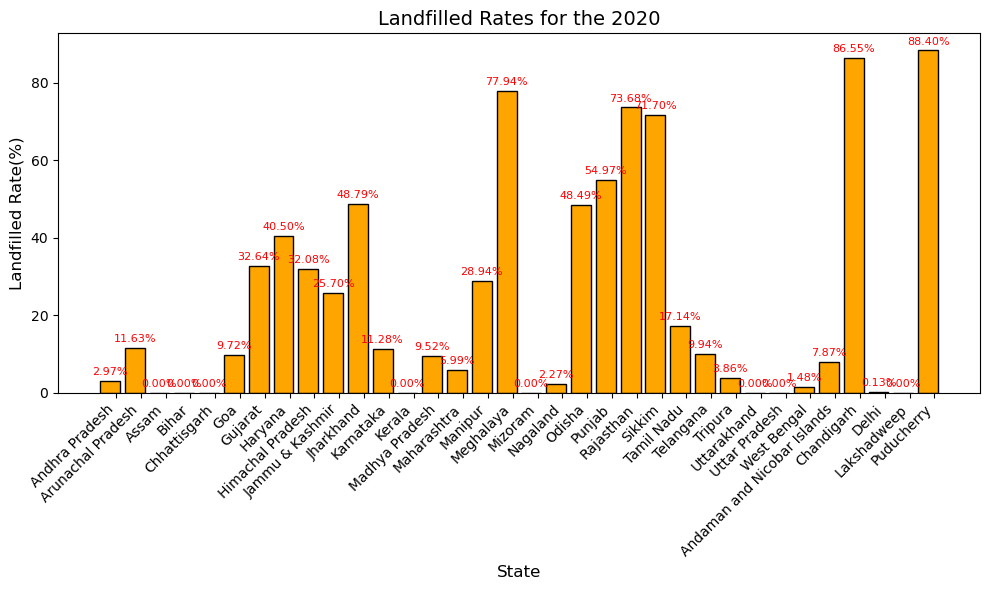

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting a bar graph for Recycling Rates
plt.figure(figsize=(10, 6))

bar_positions = np.arange(len(df5['States']))

# Plotting the Recycling Rates
plt.bar(bar_positions, df5['Landfill_Rate'], color='orange', edgecolor='black')

# Adding data labels
for i, value in enumerate(df5['Landfill_Rate']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='red')

# Adding labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Landfilled Rate(%)', fontsize=12)
plt.title('Landfilled Rates for the 2020', fontsize=14)
plt.xticks([pos + bar_width for pos in bar_positions], df5['States'], rotation=45, ha='right')  # Rotate labels for better visibility

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [280]:
import pandas as pd

#Total Waste Managed
df5['Total_Waste_Managed'] = df5['Waste_collected'] + df5['Waste_recycled'] + df5['Waste_landfilled']

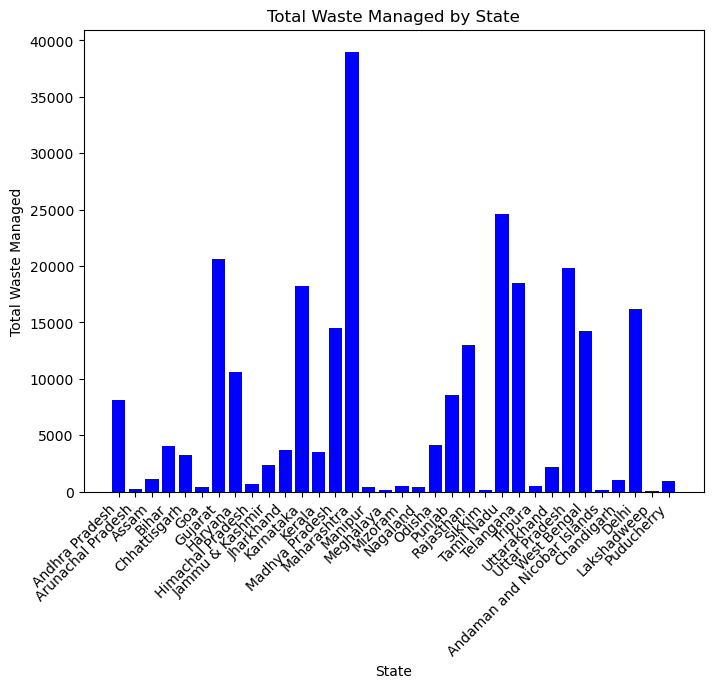

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Plot Total Waste Managed
plt.figure(figsize=(8, 6))
plt.bar(df5['States'], df5['Total_Waste_Managed'], color='blue')
plt.xlabel('State')
plt.ylabel('Total Waste Managed')
plt.title('Total Waste Managed by State')
plt.xticks(rotation=45, ha="right")
plt.show()

In [282]:
import pandas as pd

# Read individual DataFrames
'''df1=pd.read_excel('cleaned_data2013.xlsx')
df2=pd.read_excel('cleaned_data2014.xlsx')
df3=pd.read_excel('cleaned_data2015.xlsx')
df4=pd.read_excel('cleaned_data2019.xlsx')
df5=pd.read_excel('cleaned_data2020.xlsx')'''
# Add a 'Year' column to each DataFrame
df1['Year'] = 2013
df2['Year'] = 2014
df3['Year'] = 2015
df4['Year'] = 2019
df5['Year'] = 2020

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Rename columns for consistency
combined_df.rename(columns={'Waste_collected': 'waste_collection',
                            'Waste_generated': 'waste_generation',
                            'Waste_recycled': 'waste_recycled',
                            'Untreated':'Waste_untreated',
                            'Recycling_Rate':'recycling_rate',
                            'Waste_landfilled': 'waste_landfills',
                            'Landfill_Rate': 'landfill_rate',
                            'Total_Waste_Managed': 'total_waste_managed'}, inplace=True)

# Reorder columns
column_order = ['Year', 'States', 'waste_collection', 'waste_generation', 'waste_recycled', 'recycling_rate', 'waste_landfills', 'landfill_rate', 'total_waste_managed']
combined_df = combined_df[column_order]

# Display the combined DataFrame
print(combined_df.head(50))

    Year                    States  waste_collection  waste_generation  \
0   2013         Andaman & Nicobar              70.0              70.0   
1   2013  Andhra Pradesh/Telengana           10656.0           11500.0   
2   2013         Arunachal Pradesh              82.0             110.0   
3   2013                     Assam             350.0             650.0   
4   2013                     Bihar               0.0            1670.0   
5   2013                Chandigarh             330.0             340.0   
6   2013              Chhattisgarh            1704.0            1896.0   
7   2013         Daman Diu & Dadra              85.0              85.0   
8   2013                     Delhi            7000.0            8390.0   
9   2013                       Goa             182.0             183.0   
10  2013                   Gujarat            9227.0            9227.0   
11  2013                   Haryana            3440.0            3490.0   
12  2013          Himachal Pradesh    

In [283]:
combined_df.shape
combined_df.info()
combined_df.describe(include='all')
combined_df.fillna(0, inplace=True) #we replace all NAN values into 0
combined_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 172 non-null    int64  
 1   States               172 non-null    object 
 2   waste_collection     172 non-null    float64
 3   waste_generation     172 non-null    float64
 4   waste_recycled       172 non-null    float64
 5   recycling_rate       172 non-null    float64
 6   waste_landfills      138 non-null    float64
 7   landfill_rate        138 non-null    float64
 8   total_waste_managed  138 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 12.2+ KB


Year                   0
States                 0
waste_collection       0
waste_generation       0
waste_recycled         0
recycling_rate         0
waste_landfills        0
landfill_rate          0
total_waste_managed    0
dtype: int64

In [284]:
# Access data for multiple specific years, for example, 2014 and 2019
combined_df[combined_df['Year'] == 2014]

,Year,States,waste_collection,waste_generation,waste_recycled,recycling_rate,waste_landfills,landfill_rate,total_waste_managed
34,2014,Andaman &Nicobar,70.0,70.0,5.0,7.142857,0.0,0.000000,75.0
35,2014,Andhra Pradesh,4287.0,4760.0,6402.0,100.000000,0.0,0.000000,10689.0
36,2014,Arunachal Pradesh,70.5,116.0,0.0,0.000000,0.0,0.000000,70.5
37,2014,Assam,350.0,650.0,0.0,0.000000,0.0,0.000000,350.0
38,2014,Bihar,0.0,1670.0,0.0,0.000000,0.0,0.000000,0.0
39,2014,Chandigarh,360.0,370.0,250.0,67.567568,0.0,0.000000,610.0
40,2014,Chhattisgarh,1704.0,1896.0,168.0,8.860759,0.0,0.000000,1872.0
41,2014,Daman Diu &Dadra,85.0,85.0,0.0,0.000000,0.0,0.000000,85.0
42,2014,Delhi,8300.0,8370.0,3240.0,38.709677,0.0,0.000000,11540.0
43,2014,Goa,400.0,450.0,182.0,40.444444,0.0,0.000000,582.0


In [285]:
# Access data for multiple specific years, for example, 2014 and 2019
combined_df.head()

,Year,States,waste_collection,waste_generation,waste_recycled,recycling_rate,waste_landfills,landfill_rate,total_waste_managed
0,2013,Andaman & Nicobar,70.0,70.0,5.0,7.142857,0.0,0.0,0.0
1,2013,Andhra Pradesh/Telengana,10656.0,11500.0,9418.0,81.895652,0.0,0.0,0.0
2,2013,Arunachal Pradesh,82.0,110.0,74.0,67.272727,0.0,0.0,0.0
3,2013,Assam,350.0,650.0,100.0,15.384615,0.0,0.0,0.0
4,2013,Bihar,0.0,1670.0,0.0,0.000000,0.0,0.0,0.0


In [286]:
combined_df.to_excel('IndiaWaste.xlsx', index=False)

In [287]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target variables (y)
X = combined_df.drop(columns=['States','waste_collection', 'waste_recycled', 'waste_landfills', 'recycling_rate', 'landfill_rate','total_waste_managed'])
y = combined_df[['waste_collection', 'waste_recycled', 'waste_landfills', 'recycling_rate', 'landfill_rate','total_waste_managed']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor as the base model
base_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize the MultiOutputRegressor with the base model
model = MultiOutputRegressor(base_model)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 7590837.058912802


In [288]:
model.score(X_test,y_pred)
#model.score(X_train,y_train)

1.0

In [289]:
import pandas as pd

# Define features
features = ['Year','waste_generation']

# Create a DataFrame for new data
new_data = pd.DataFrame(columns=features)

# Populate the DataFrame with values
new_data.loc[0] = [2017,90]  # Add a new row with values for each feature

# Make predictions with the trained model using the new data
predict = model.predict(new_data)

In [290]:
predict

array([[79.982     , 20.2457    , 32.6016    ,  6.2700601 , 44.88340795,
        88.73836   ]])

In [291]:
import pandas as pd

model_columns = ['Year', 'waste_generation']

# Create a DataFrame for new data with columns aligned with the model
new_data = pd.DataFrame(columns=model_columns)

# Populate the DataFrame with values for each feature
# Add a new row with values for each feature
new_data.loc[0] = [2001,90] 

# Make predictions with the trained model using the new data
new_predictions = model.predict(new_data)

# Convert the predictions array into a DataFrame
new_predictions_df = pd.DataFrame(new_predictions, columns=['waste_collection', 'waste_recycled', 'waste_landfills', 'recycling_rate', 'landfill_rate', 'total_waste_managed'])

# Print the predictions
print(new_predictions_df)

   waste_collection  waste_recycled  waste_landfills  recycling_rate  \
0           81.1152         20.3907              0.0        6.817876   

   landfill_rate  total_waste_managed  
0            0.0                6.145  


In [292]:
new_data.loc[1] = [2012,250] 

# Make predictions with the trained model using the new data
new_predictions = model.predict(new_data)

# Convert the predictions array into a DataFrame
new_predictions_df = pd.DataFrame(new_predictions, columns=['waste_collection', 'waste_recycled', 'waste_landfills', 'recycling_rate', 'landfill_rate', 'total_waste_managed'])

# Print the predictions
print(new_predictions_df)

   waste_collection  waste_recycled  waste_landfills  recycling_rate  \
0           81.1152         20.3907              0.0        6.817876   
1          197.4216         56.4589              9.0       28.882049   

   landfill_rate  total_waste_managed  
0       0.000000               6.1450  
1       2.173913              18.0282  
